<a href="https://colab.research.google.com/github/Khadija151/NodeJs/blob/master/gaza_data_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import random
import math
import csv
import matplotlib.pyplot as plt


In [9]:
def visual_angle_to_pixels(angle, screen_res, screen_width, viewing_distance):
    """
    Convert visual angle in degrees to pixels.
    """
    dpp = screen_width / screen_res  # degrees per pixel
    size_in_deg = 2 * math.atan(dpp / (2 * viewing_distance)) * (180 / math.pi)
    return angle / size_in_deg

def generate_gaze_data(duration, sampling_rate, fixation_duration_range,
                       saccade_velocity_range, screen_res, screen_width, viewing_distance):
    """
    Generate gaze data based on the given parameters.
    """
    num_points = duration * sampling_rate
    data = []
    time = 0
    while time < num_points:
        fixation_duration = random.randint(*fixation_duration_range)
        saccade_velocity = random.uniform(*saccade_velocity_range)
        for _ in range(fixation_duration):
            if time >= num_points:
                break
            x, y = random.randint(0, screen_res[0]), random.randint(0, screen_res[1])
            data.append([time/sampling_rate, x, y])
            time += 1
        saccade_duration = int(visual_angle_to_pixels(saccade_velocity,
                                                     screen_res[0], screen_width, viewing_distance))
        time += saccade_duration
    return data

In [10]:
# Parameters
duration = 10  # seconds
sampling_rate = 50  # Hz
fixation_duration_range = (100, 250)  # milliseconds
saccade_velocity_range = (300, 500)  # degrees per second
screen_res = (1024, 768)  # pixels
screen_width = 53.34  # cm
viewing_distance = 60  # cm

# Generate gaze data
gaze_data = generate_gaze_data(duration, sampling_rate, fixation_duration_range,
                               saccade_velocity_range, screen_res, screen_width, viewing_distance)

# Save to CSV
csv_filename = 'gaze_data.csv'
with open(csv_filename, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Timestamp', 'X', 'Y'])
    for row in gaze_data:
        writer.writerow(row)


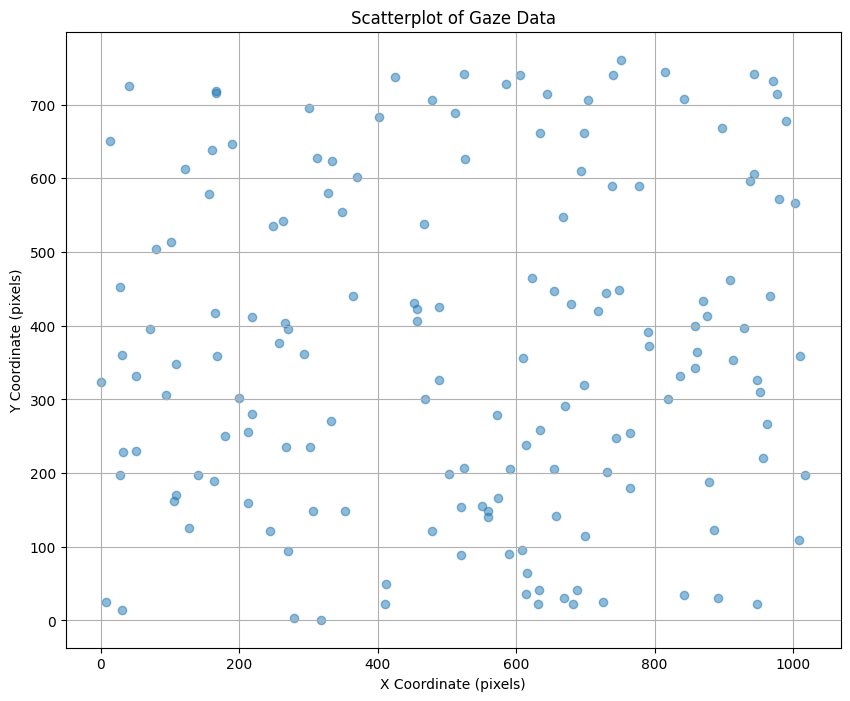

In [11]:
# Scatter plot function
def plot_gaze_data(gaze_data):
    """
    Plot the scatterplot of the gaze data.
    """
    x_coords = [point[1] for point in gaze_data]
    y_coords = [point[2] for point in gaze_data]

    plt.figure(figsize=(10, 8))
    plt.scatter(x_coords, y_coords, alpha=0.5)
    plt.title('Scatterplot of Gaze Data')
    plt.xlabel('X Coordinate (pixels)')
    plt.ylabel('Y Coordinate (pixels)')
    plt.grid(True)
    plt.show()

# Plotting the scatter plot of the gaze data
plot_gaze_data(gaze_data)
